# Importing libraries #

In [107]:
!pip install pandas

DEPRECATION: Loading egg at c:\users\atakan\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\indexer-0.6.2-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV #

In [109]:
"""Verimizi çalismaya uygun hale getiriyoruz."""
import pandas as pd
df = pd.read_csv("amazon_prime_titles.csv")

In [110]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


# Data preprocessing #

In [111]:
df.isna().sum() # Control missing values

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [112]:
df.duplicated().sum() # Control duplicated values

np.int64(0)

In [113]:
# Missing values percentage
missing_values = df.isnull().sum()
total_values = df.shape[0]

# Missing values percentage
percentage_missing = round((missing_values / total_values) * 100, 2)

print(percentage_missing)

show_id          0.00
type             0.00
title            0.00
director        21.55
cast            12.75
country         93.05
date_added      98.40
release_year     0.00
rating           3.49
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


In [114]:
# Deleting rows with missing values .
df.drop(['cast','country', 'date_added'], axis=1, inplace=True)

In [115]:
df['director'].fillna('Unknown', inplace=True) # Eksik degerleri dolduruyoruz.

In [116]:
# Deleting the rows with missing values
df['rating'].fillna('NR', inplace=True)

In [117]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

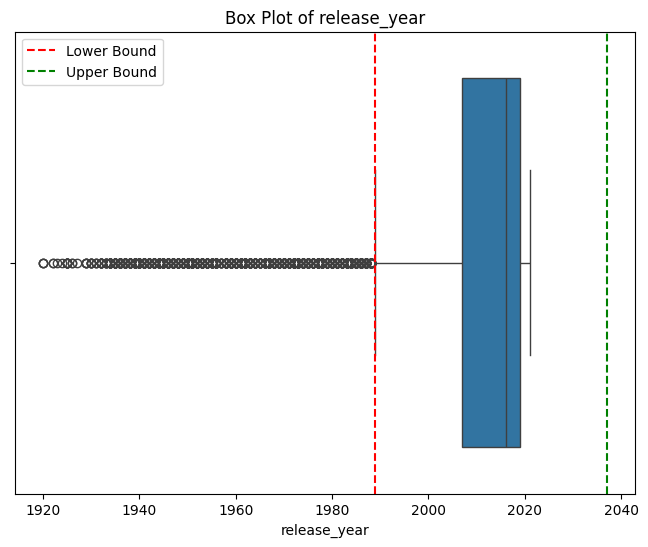

Lower Bound: 1989.0
Upper Bound: 2037.0


In [118]:

for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])

        # calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # calculate the lower bound and upper bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Show lower and upper bounds on the plot
        plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
        plt.axvline(x=upper_bound, color='g', linestyle='--', label='Upper Bound')

        plt.title(f'Box Plot of {col}')
        plt.legend()
        plt.show()

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

In [119]:
# Handling Outlier
filtered_data = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]
df_cleaned = filtered_data.copy()

# Outlier analysis #

<Figure size 2000x1000 with 0 Axes>

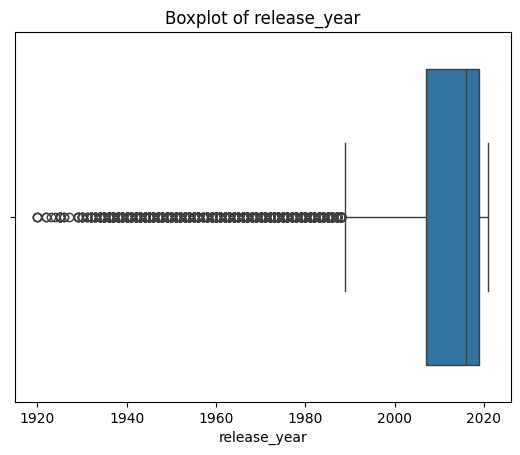

<Figure size 2000x1000 with 0 Axes>

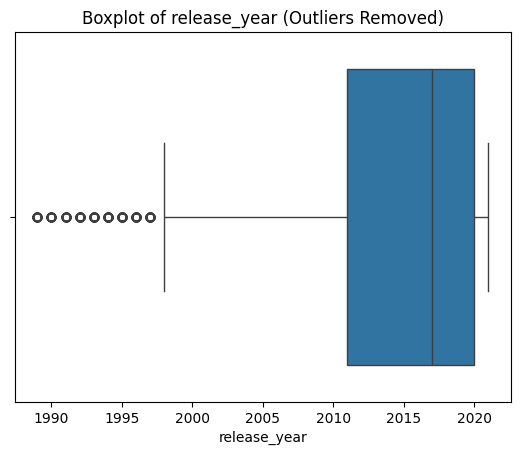

In [120]:
# Aykırı gözlemleri görselleştirmek için boxplot kullanın
plt.figure(figsize=(20, 10))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Aykırı gözlemleri kaldırmak için IQR yöntemini kullanın
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Tüm sayısal sütunlar için aykırı gözlemleri kaldırın
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, column)

# Aykırı gözlemler kaldırıldıktan sonra veriyi tekrar görselleştirin
plt.figure(figsize=(20, 10))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.show()

In [121]:
df.shape

(8594, 9)

# What is the percentage of the Series and Movies #

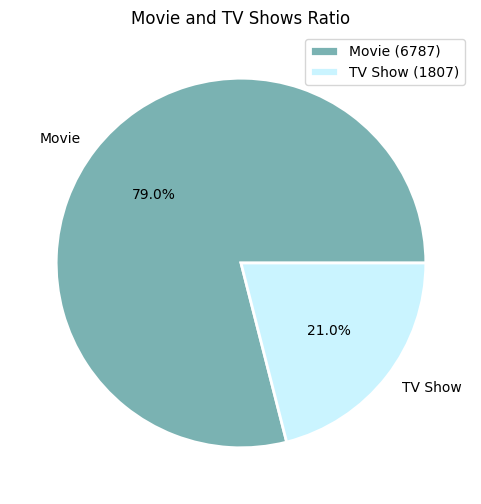

In [122]:
# counts the number of occurrences of each value in the 'type' column
type_counts = df_cleaned['type'].value_counts()

# plot pie chart
plt.figure(figsize = (6,6))
plt.pie(
    x= type_counts.values,labels = type_counts.index,autopct = '%.1f%%',
    wedgeprops = {'linewidth': 2.0,'edgecolor': 'white'},
    colors = ['#7AB2B2', '#CAF4FF']
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels = [f"{label} ({count})" for label, count in zip(type_counts.index, type_counts.values)],loc='best')
plt.show()

Amazon Prime Video focuses more on providing movies than TV shows.

# Number of Shows by Release Year #

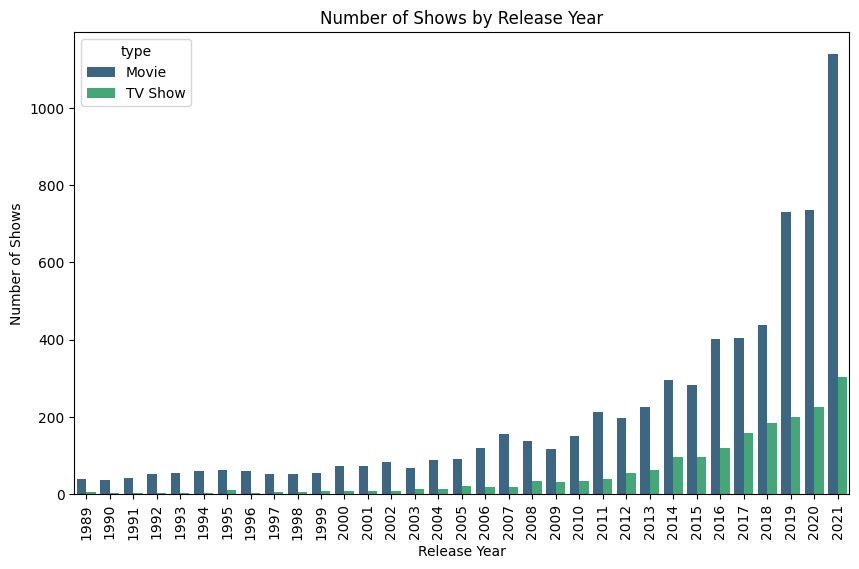

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of shows by release year
release_year_counts = df_cleaned['release_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=df_cleaned, hue='type', order=release_year_counts.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.show()

The amount of content added to Amazon Prime has significantly increased year-on-year since the early 2000s, especially in recent years, the number of movies released annually is much higher compared to TV shows and 2021 shows the highest amount of content.

# Distribution of genres with count #

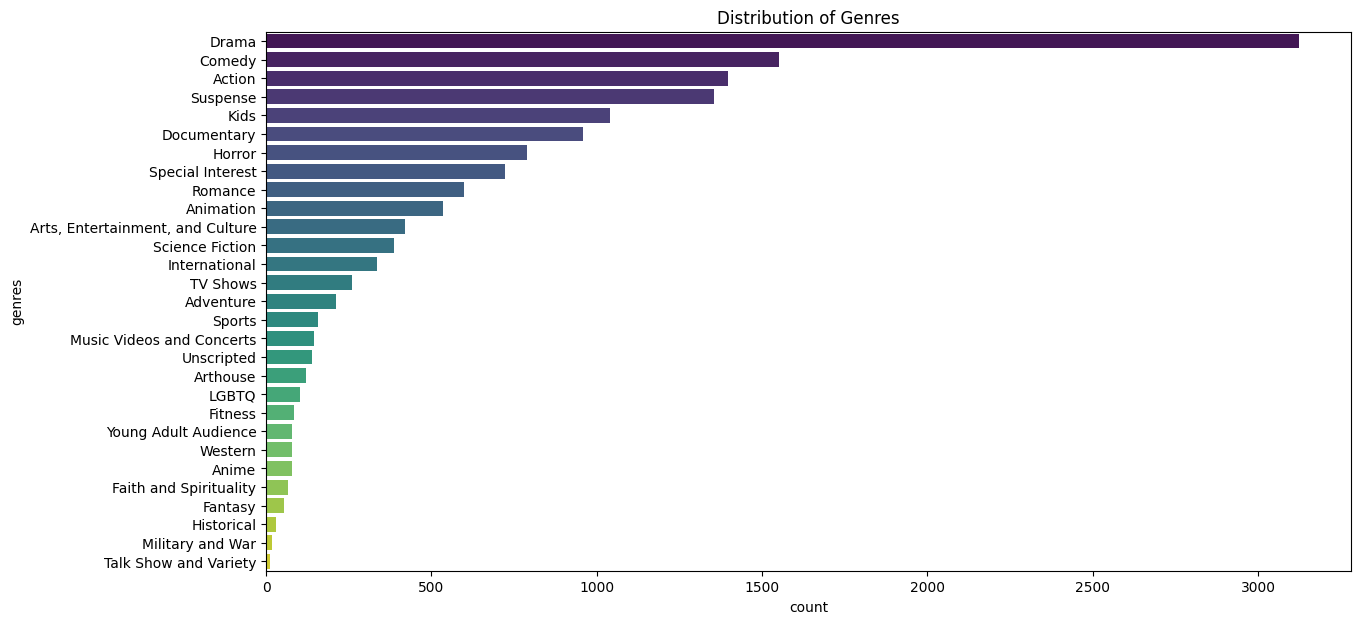

In [124]:
# Distribution of genres
# Splitting the genres
def extract_genres(listed_in):
    if 'Arts, Entertainment, and Culture' in listed_in:
        return ['Arts, Entertainment, and Culture']
    else:
        return [genre.strip() for genre in listed_in.split(',')]

df_cleaned['genres'] = df_cleaned['listed_in'].apply(extract_genres)

# Exploding the genres into separate rows
genres_exploded = df_cleaned.explode('genres')

# Plotting the distribution of genres
plt.figure(figsize = (14, 7))
sns.countplot(data = genres_exploded, y = 'genres', order = genres_exploded['genres'].value_counts().index, palette = 'viridis')
plt.title('Distribution of Genres')
plt.show()

Genres like Drama top the list with the most amount of content, followed by Comedy and Action.

# Distribution of show number and ratings #

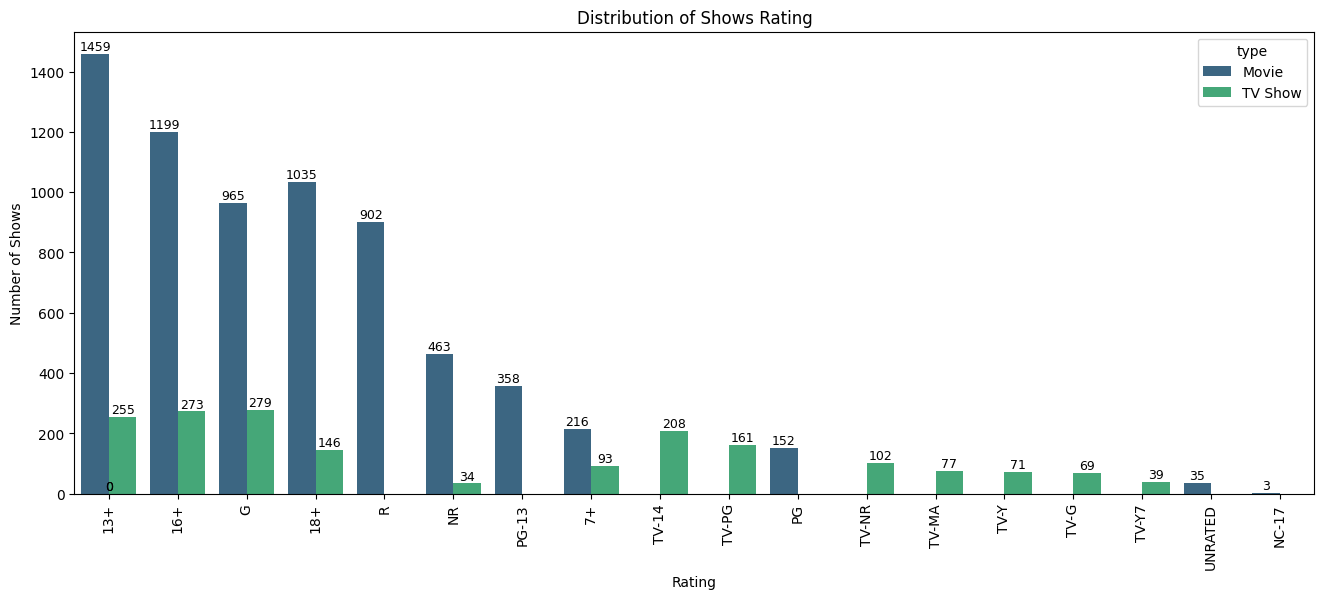

In [125]:
df_cleaned['rating'] = df_cleaned['rating'].replace({
    'ALL': 'G',
    'AGES_18_': '18+',
    'AGES_16_': '16+',
    '16' : '16+',
    'ALL_AGES': 'G',
    'NOT_RATE': 'UNRATED'
})

# Plotting the distribution of Shows Rating
plt.figure(figsize = (16,6))
sns.countplot(x='rating', data=df_cleaned, hue='type', order=df_cleaned['rating'].value_counts().index, palette='viridis')
plt.xticks(rotation = 90)
plt.title('Distribution of Shows Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

The 13+ and 16+ ratings dominate and movies outnumber TV shows in almost all rating categories

# Distribution of keywords in movie and TV series names #

In [126]:
from collections import Counter
import re

# "title" sütununu al
titles = df['title'].dropna()

# Tüm başlıkları birleştir ve kelimelere ayır
words = re.findall(r'\b\w+\b', ' '.join(titles).lower())

# İngilizce stopwords listesi
stopwords = set([
    "the", "a", "an", "and", "or", "of", "to", "in", "on", "at", "for", "with", 
    "by", "from", "is", "it", "this", "that", "as", "are", "was", "be", "we", 
    "you", "your", "our", "their", "my", "but", "not", "so", "if", "they", 
    "he", "she", "him", "her", "what", "which", "when", "where", "who", 
    "how", "there", "here", "all", "about", "has", "have", "had", "do", "does","4k","15"
    ,"0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"
    ,"i","a","b","c","d","e","f","g","h","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"
])

# Stopwords'i filtrele
filtered_words = [word for word in words if word not in stopwords]

# Kelime sıklığını hesapla
word_counts = Counter(filtered_words)

# En sık geçen ilk 20 kelime
most_common_words = word_counts.most_common(20)
most_common_words


[('kids', 170),
 ('little', 131),
 ('love', 122),
 ('baby', 116),
 ('more', 100),
 ('songs', 94),
 ('uhd', 88),
 ('world', 84),
 ('story', 79),
 ('life', 75),
 ('minute', 75),
 ('christmas', 74),
 ('bum', 71),
 ('last', 68),
 ('night', 64),
 ('nursery', 61),
 ('day', 61),
 ('man', 59),
 ('american', 59),
 ('rhymes', 58)]

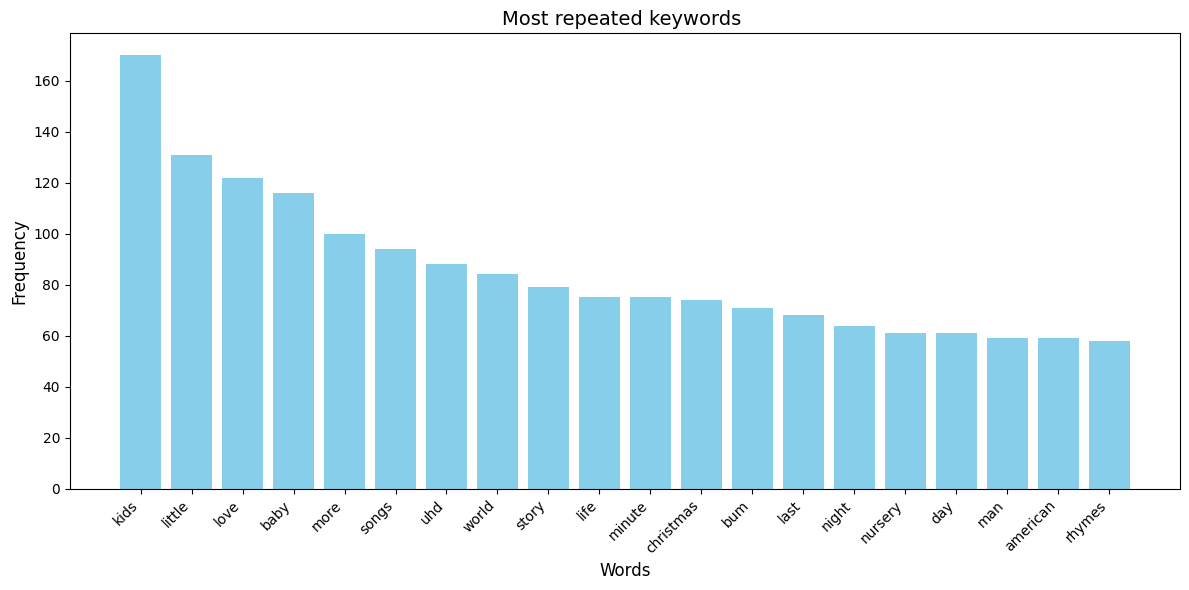

In [127]:

# Kelimeler ve frekanslarını ayır
words, counts = zip(*most_common_words)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most repeated keywords ', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
